#### In class, we did linear regression, lasso and ridge regression models on the data provided with polynomial features. Today, we will fit these models on the given data using features inspired by discrete time Fourier series : sinusoids of different frequencies.  

#### Import the necessary libraries and modules here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

#### Import and plot the data from data1.txt . The first column is the input data and the second column is the signal.

In [6]:
X = np.loadtxt("data1.txt", delimiter=', ')


In [10]:
x = X[:,0]

#### Let x be the first column provided in data1.txt . Generate 100 sinusoids as per the following equation.  <br> <br>$$f(k)=sin(2{\pi}*k*x/100) \,\,\,k=1,2,3...100$$ <br><br>These sinuosids are the features that you will now use for training. Plot and visualize a few features.

In [42]:
matrix = np.zeros((100,100))
for k in range(1,100):
    matrix[k-1] = np.sin((2*np.pi*k*x/100))

In [43]:
matrix = matrix.T

In [45]:
matrix.shape

(100, 100)

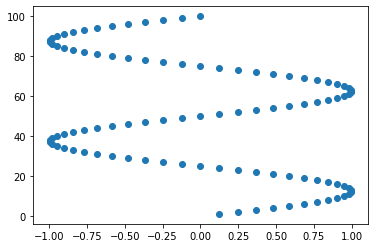

In [55]:
plt.scatter(matrix[:,1],X[:,0])


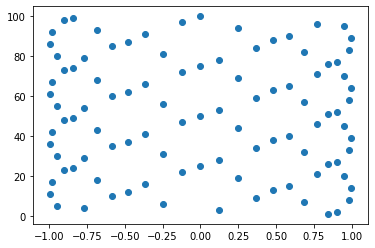

In [56]:
plt.scatter(matrix[:,15],X[:,0])


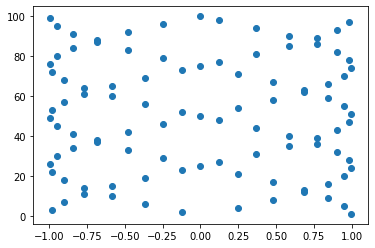

In [57]:
plt.scatter(matrix[:,25],X[:,0])


#### Use linear regression without any regularization, lasso and ridge regression models to fit data1.txt . For ridge and lasso, use the optimal tuning parameter found using 5-fold cross validation. Report the coefficient values for each model. Answer the following :  <br> <br> 1. Does the signal in data1.txt contain any dominant frequencies? If yes, identify them. Which model helped you answer this? Give reasons. <br><br>2. Plot the reconstructed signal and the signal in data1.txt using all the three models and compare. Plot separately for each model. <br><br> 

In [54]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [58]:
regr_cv = RidgeCV(alphas = np.logspace(-3,3,100))

In [60]:
lin = LinearRegression()

In [61]:
lin.fit(matrix, X[:,1] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lin.coef_

array([ 1.80343219e+13,  1.04443447e+12, -2.09015677e+13, -3.52504280e+12,
        2.09026617e+13,  2.11141250e+13, -6.39256500e+12, -1.35697525e+13,
        1.73753465e+13, -5.09289476e+12,  5.55301302e+12,  8.31097945e+12,
       -5.10273932e+12, -9.56359874e+12,  1.46739371e+13,  2.56210145e+12,
        5.90124759e+11, -1.04501421e+13,  6.76197655e+12, -1.02707571e+13,
       -6.22037274e+12, -5.97845107e+12,  4.08325132e+12,  1.24525142e+13,
       -7.35422774e+12,  1.43731338e+12, -3.48046672e+12,  2.45490626e+13,
        4.59615633e+12, -4.57262084e+11, -3.39025358e+13,  2.52628877e+13,
        1.21544779e+13,  7.42233368e+12,  3.81128084e+12,  4.78853398e+12,
       -2.77653215e+13,  3.95019813e+12,  3.13486518e+13, -9.92074434e+12,
       -1.03426212e+13,  3.65173805e+13, -2.38790048e+12,  8.79032190e+11,
       -2.19183222e+12,  8.19922042e+12, -8.42713681e+11,  2.20951368e+13,
        1.33438962e+13,  2.17592235e+12,  1.33438962e+13,  2.20951368e+13,
       -8.42713681e+11,  

In [63]:
ridge_cv = regr_cv.fit(matrix, X[:,1])

In [66]:
ridge_alpha = ridge_cv.alpha_

In [67]:
ridgeModel = Ridge(alpha = ridge_alpha) 
ridgeModel.fit(matrix, X[:,1])


Ridge(alpha=1.072267222010323, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
ridgeModel.coef_

array([ 2.54084004e+00,  4.92347060e+00, -1.50797962e-02,  5.16590618e-02,
       -1.77136366e-02,  4.75143279e-02, -4.74248637e-03,  5.89440186e-03,
        8.21443697e-02, -2.26680656e-02,  7.43940360e-02, -6.10836958e-03,
       -2.26936802e-04,  1.46419159e-01, -1.48035475e-01, -1.24719288e-01,
       -1.85582721e-02,  1.56032155e-02,  1.27989216e-02,  2.40111643e-02,
       -5.72388803e-03, -3.44069978e-02, -1.56209962e-02, -7.65867323e-02,
        3.31724594e-02,  3.04938254e-02,  5.89852303e-02,  1.60924202e-01,
       -1.29585647e-02, -3.23558794e-02,  4.08474040e-03,  1.09677373e-01,
        8.81003523e-02,  2.16310548e-02, -3.69403768e-02, -1.62872321e-02,
        1.08863992e-01,  1.12305340e-02, -4.16141803e-02, -1.28448473e-03,
       -3.82590502e-02,  1.74280125e-02,  3.64592259e-03,  8.17994563e-02,
        2.05389906e-02,  1.09851964e-01,  6.60896716e-04,  7.10901397e-02,
        4.76947306e-02,  4.55575213e-14, -4.76947306e-02, -7.10901397e-02,
       -6.60896716e-04, -

In [69]:
lass_cv = LassoCV(alphas = np.logspace(-3,3,100))

In [70]:
lasso_cv = lass_cv.fit(matrix, X[:,1])

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [72]:
lasso_alpha = lasso_cv.alpha_

In [74]:
lassoModel = Lasso(alpha = ridge_alpha) 
lassoModel.fit(matrix, X[:,1])


Lasso(alpha=1.072267222010323, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
lassoModel.coef_

array([ 2.99163482e+00,  7.80799227e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

The lasso model tells us that k =1,2,98 are the dominant frequencies. The lasso model helps us as it gives us more sparser weights as compared to ridge 

In [76]:
Y_lin = lin.predict(matrix)

In [78]:
Y_ridge = ridgeModel.predict(matrix)

In [79]:
Y_lasso = lassoModel.predict(matrix)

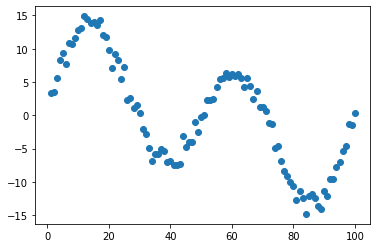

In [80]:
plt.scatter(X[:,0],X[:,1])


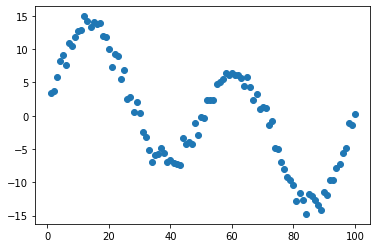

In [81]:
plt.scatter(X[:,0],Y_lin)


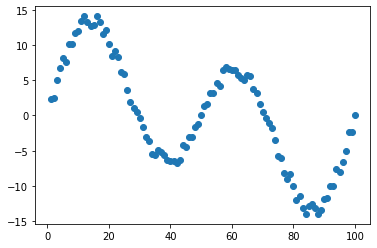

In [82]:
plt.scatter(X[:,0],Y_ridge)


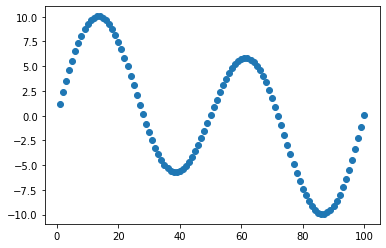

In [83]:
plt.scatter(X[:,0],Y_lasso)


Lasso model fits it very perfectly